# DBSDCAN
Liam Haas-Neill <br>
*Adaptation of the K-means notebook from Chris Nunn and Jeremy Rothschild*

## Theory
#### Hyperparameters:
d - minimum nearest neighbour radius<br>
Nmin - minimum number of neareset neighbours to define a core point <br>
#### Point Types:
Core Points: Points which have at least Nmin points in a radius of d away from them.<br>
Directly Reachable Points: A point Q is directly reachable from a point P if if it less than d distance away.<br>
Reachable Point: a point Q is reachable from core point P if there exists a path of n points p(i), such that p(i+1) is directly reachable from p(i), and P=p(1) and Q=p(n) <br>


#### DBSCAN algorithm
1. Pick d and Nmin
2. Visit an unvisited point
3. Determine if it is a core point
4. If it is not (and also not in a cluster already): label as noise, move to new point
5. If it is: add it and its nearest neighbours to a cluster
6. Repeat from 2 until all points have been visited

#### Discussion

The DBSCAN clustering algorithm cluterizes data based on continuous regions of dense data separated by regions of low density data. It allows clusters of any shape, and does not require specification of the number of clusters.


### The Original Paper:

Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In Kdd (Vol. 96, №34, pp. 226–231). https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf

Provides several rigorous definitions of point types, clusters, etc.

#### d-Neighbourhood
for dataset D, points p,q:<br> 
Nd(p) = {q in D | dist(p,q) <= d}
#### Directly Density Reachable
p is DDR from q if 
1. p is in Nd(q)
2. |Nd(q)| >= Nmin

#### Density Reachable
p is density reachable from q if there exists a chain of points p1,...,pn; (p1 = q, pn = p) such that pi+1  is directly density reachable from pi
#### Density Connected
p is density connected to q if there exists a point o such that p and q are both density reachable from o.
#### Cluster
A non empty subset of (dataset)D such that
1. for all p,q : if p is in cluster C and q is directl reachable from p, then q is in C
2. for all p, q in C: p is density connected to q

#### Noise
Points in D which are not in any cluster

### Example 1: Nice clumpy data<a id='linkExample1'></a>

In [3]:
import matplotlib.pyplot as plt
from numpy import *
import random
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

Generate some data with a number of fuzzy clusters, then plot it.


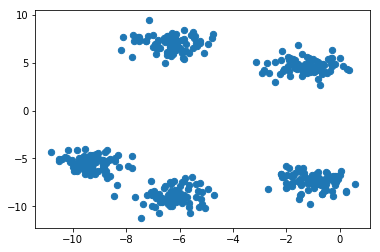

In [4]:
x,x_label = make_blobs(n_samples=400, centers=5, cluster_std=0.70, random_state=None)
plt.scatter(x[:,0], x[:,1], s=40)

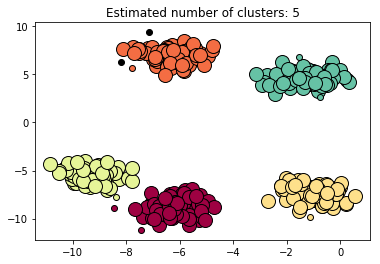

In [17]:
#CLUSTER WITH DBSCAN
from sklearn.cluster import DBSCAN
import numpy as np
# Compute DBSCAN
db = DBSCAN(eps=1., min_samples=4).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Example 2: Nonlinear boundaries (curves/nested circles) <a id='linkExample2'></a>

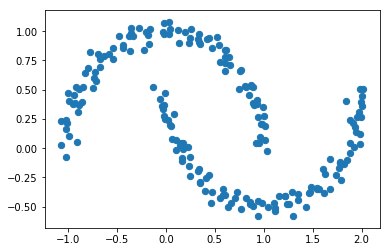

In [18]:
y,y_label = make_moons(200, noise=.05, random_state=0)
plt.scatter(y[:,0], y[:,1], s=40)

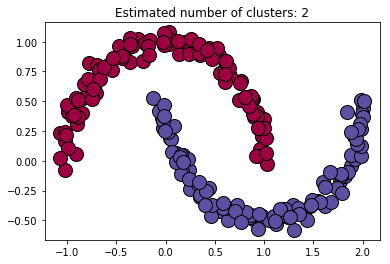

In [19]:
#Cluster with DBSCAN
#CLUSTER WITH DBSCAN
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=4).fit(y)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = y[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = y[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

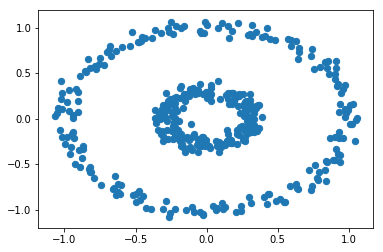

In [20]:
z, z_labels = make_circles(n_samples=400, factor=.3, noise=.05)
plt.scatter(z[:,0], z[:,1], s=40)

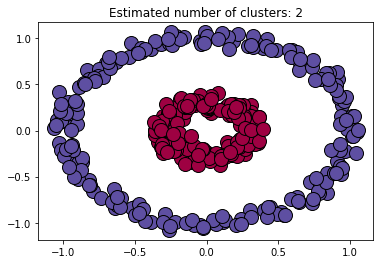

In [21]:
#Cluster with DBSCAN
#CLUSTER WITH DBSCAN
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=.3, min_samples=4).fit(z)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = z[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = z[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()